# Quadruped Motion Data

In [1]:
from ase.poselib.quadruped_motion_data import MotionData 

path_to_motion_data = 'ase/data/motions/quadruped/dog_trot.txt'
motion_data = MotionData(path_to_motion_data)

In [8]:
print(f"Number of frames: {motion_data.get_num_frames()}")
print(f"Time (s) per frame: {motion_data.get_frame_duration()}")
print(f"Frame len: {len(motion_data.get_frame(0))}")
print(f"First frame: {motion_data.get_frame(0)}")

Number of frames: 33
Time (s) per frame: 0.01667
Frame len: 19
First frame: [ 0.          0.          0.41758     0.48547893  0.51474886  0.52473884
  0.47327895 -0.13469     0.19749    -0.98728    -0.29301    -0.20471
 -1.23984    -0.23355     0.42011    -1.21791    -0.18938     0.26441
 -0.94834   ]


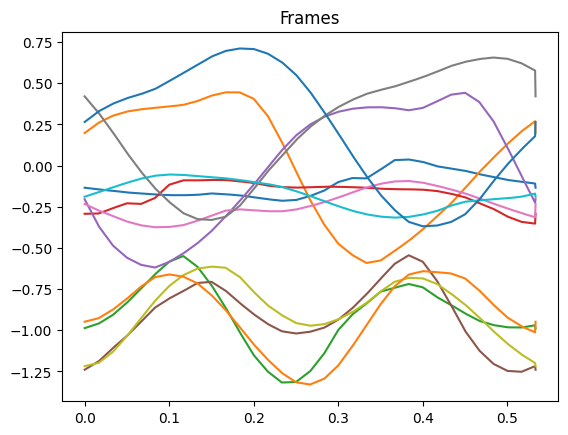

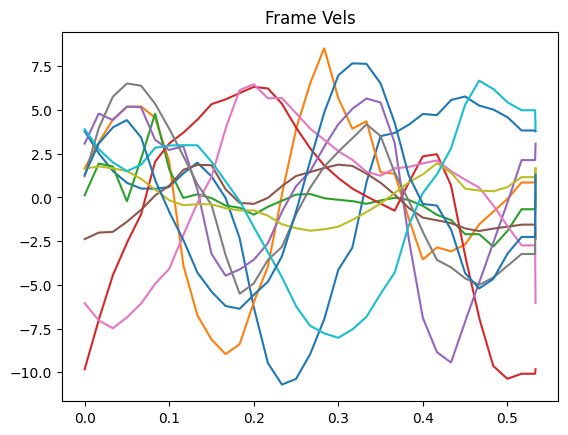

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def visualize(motion_data: MotionData):

    start_time = 0
    end_time = motion_data.get_duration()
    num_interp = 1000

    ts = np.linspace(start_time, end_time, num = num_interp)
    frames = np.zeros((num_interp, motion_data.get_frame_size()))
    frame_vels = np.zeros((num_interp, motion_data.get_frame_size()-1))
    for i, t in enumerate(ts):
        frames[i] = motion_data.calc_frame(t)
        frame_vels[i] = motion_data.calc_frame_vel(t)
    

    plt.figure()
    # Do not plot body pos and orn
    # Only plot 12 DOF changes
    for k in range(7, motion_data.get_frame_size()):
        plt.plot(ts, frames[:, k])
        plt.title("Frames")
    plt.show()

    plt.figure()
    # Do not plot body pos and orn
    # Only plot 12 DOF changes
    for k in range(7, motion_data.get_frame_size()-1):
        plt.plot(ts, frame_vels[:, k])
        plt.title("Frame Vels")
    plt.show()
    

visualize(motion_data)